The CT scan data can be downloaded from http://headctstudy.qure.ai/dataset. The images are in [DICOM](https://www.dicomstandard.org/) format, which can be open by [pydicom](https://github.com/pydicom/pydicom).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pydicom

# Download data

In [2]:
!wget https://s3.ap-south-1.amazonaws.com/qure.headct.study/CQ500-CT-0.zip

--2019-09-24 15:42:58--  https://s3.ap-south-1.amazonaws.com/qure.headct.study/CQ500-CT-0.zip
Resolving s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)... 52.219.62.50
Connecting to s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)|52.219.62.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164767289 (157M) [application/zip]
Saving to: ‘CQ500-CT-0.zip’

CQ500-CT-0.zip      100%[===================>] 157.13M  8.70MB/s    in 20s     

2019-09-24 15:43:19 (8.02 MB/s) - ‘CQ500-CT-0.zip’ saved [164767289/164767289]



In [3]:
!unzip -q CQ500-CT-0.zip

In [4]:
ls 'CQ500CT0 CQ500CT0'

'Unknown Study'/


In [5]:
ls 'CQ500CT0 CQ500CT0'/'Unknown Study'

'CT 4cc sec 150cc D3D on'/    'CT 4cc sec 150cc D3D on-3'/  'CT Plain'/
'CT 4cc sec 150cc D3D on-2'/  'CT PLAIN THIN'/


In [6]:
ls 'CQ500CT0 CQ500CT0'/'Unknown Study'/'CT Plain'

CT000000.dcm  CT000006.dcm  CT000012.dcm  CT000018.dcm  CT000024.dcm
CT000001.dcm  CT000007.dcm  CT000013.dcm  CT000019.dcm  CT000025.dcm
CT000002.dcm  CT000008.dcm  CT000014.dcm  CT000020.dcm  CT000026.dcm
CT000003.dcm  CT000009.dcm  CT000015.dcm  CT000021.dcm  CT000027.dcm
CT000004.dcm  CT000010.dcm  CT000016.dcm  CT000022.dcm  CT000028.dcm
CT000005.dcm  CT000011.dcm  CT000017.dcm  CT000023.dcm  CT000029.dcm


# Open data

In [7]:
ds = pydicom.dcmread('./CQ500CT0 CQ500CT0/Unknown Study/CT Plain/CT000012.dcm')

In [8]:
ds.PatientName

'CQ500-CT-0'

In [9]:
data = ds.pixel_array
data.shape

(512, 512)

In [10]:
data.min(), data.max()

(-2000, 2677)

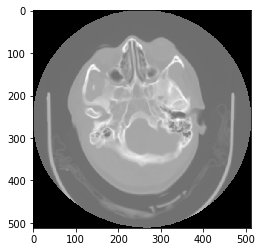

In [11]:
plt.imshow(data, cmap='gray')

# Plot multiple slices

In [12]:
def read_and_plot_ct(dirname, num_slice=0, ax=None):
    import os
    filename = os.path.join(dirname, 'CT0000{0:02d}.dcm'.format(num_slice))
    
    with pydicom.dcmread(filename) as ds:
        if ax is None:
            ax = plt.axes()
        ax.imshow(ds.pixel_array, cmap='gray')
        ax.set_title('slice={0:02d}'.format(num_slice))

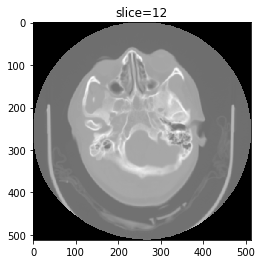

In [13]:
read_and_plot_ct('./CQ500CT0 CQ500CT0/Unknown Study/CT Plain/', num_slice=12)

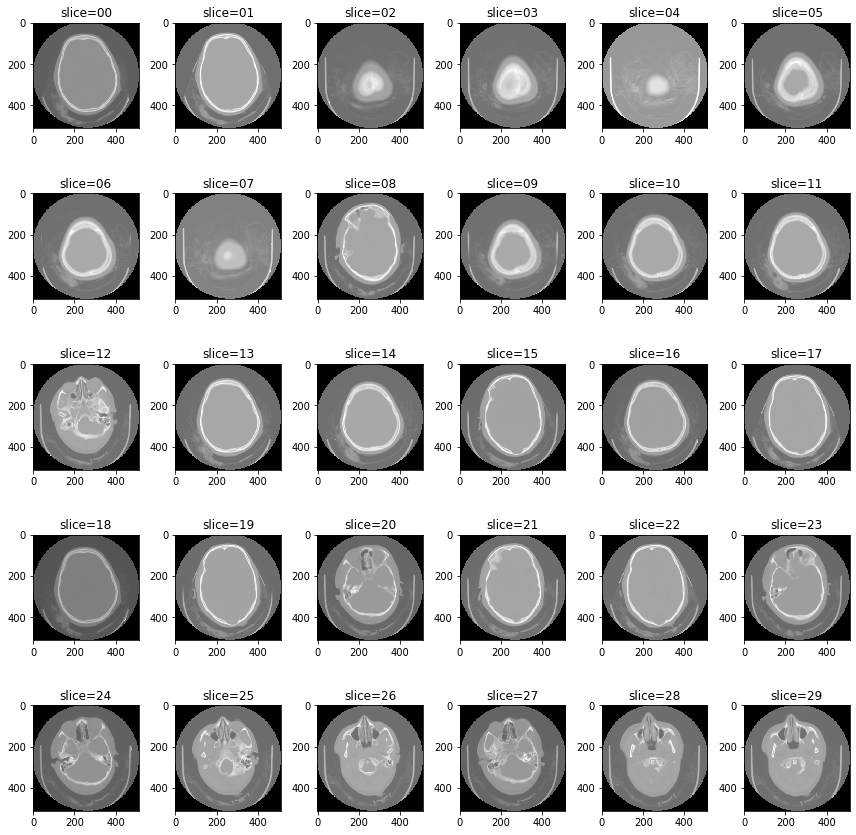

In [14]:
fig, axes = plt.subplots(5, 6, figsize=[12, 12])

for i in range(30):
    read_and_plot_ct('./CQ500CT0 CQ500CT0/Unknown Study/CT Plain/', 
                     num_slice=i, ax=axes.flatten()[i])

fig.tight_layout()